In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [35]:
pd.set_option('display.min_rows', 100)

In [36]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.colormaps.get_cmap(name)(np.linspace(0, 0.9, n))

In [37]:
def rps_from_send_interval(interval_ms, batch_size = 64):
    return 1000 / interval_ms * batch_size

In [38]:
def send_inteval_from_rps(rps, batch_size = 64):
    return 1000 / rps * batch_size

In [91]:
rps_from_send_interval(4260, 128)

30.046948356807512

In [89]:
send_inteval_from_rps(60, 256)

4266.666666666667

In [92]:
1000 / 4260

0.2347417840375587

In [93]:
with open("metrics_cluster_batching_cached_no_cc_256b_12n_4cu_4260si.json") as f:
    raw = json.load(f)
points = pd.json_normalize(raw)
points.rename(columns={
    "labels.status": "status", 
    "labels.sender": "sender",
    "labels.nonce": "nonce",
    "labels.size": "size",
    "labels.batch": "id",
    "labels.node": "node",
    "labels.action": "action"
}, inplace=True)
points["end"] = points['start'] + points['duration']
points.sort_values(by='start', inplace=True)

In [94]:
points

,start,duration,action,labels.timestamp,id,labels.cus.0x63752d312d313731383337393238343134380000000000000000000000000000,labels.cus.0x63752d302d313731383337393238343134380000000000000000000000000000,labels.cus.0x63752d332d313731383337393238343134380000000000000000000000000000,size,sender,nonce,node,status,labels.cus.0x63752d322d313731383337393238343134380000000000000000000000000000,end
0,1.089143e+05,0.000000,start-load,1.718379e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.089143e+05
1,1.089151e+05,5439.670363,NaN,NaN,0.0,85.0,80.0,91.0,256.0,0.0,4.0,0.0,success,NaN,1.143547e+05
8,1.089151e+05,32449.778587,NaN,NaN,0.0,85.0,80.0,91.0,256.0,0.0,4.0,0.0,confirmed,NaN,1.413649e+05
3,1.131736e+05,15163.150091,NaN,NaN,1.0,81.0,85.0,90.0,256.0,1.0,4.0,1.0,success,NaN,1.283368e+05
12,1.131736e+05,38118.390885,NaN,NaN,1.0,81.0,85.0,90.0,256.0,1.0,4.0,1.0,confirmed,NaN,1.512920e+05
2,1.174342e+05,5420.523795,NaN,NaN,2.0,67.0,54.0,74.0,256.0,2.0,4.0,2.0,success,61.0,1.228547e+05
7,1.174342e+05,23789.265315,NaN,NaN,2.0,67.0,54.0,74.0,256.0,2.0,4.0,2.0,confirmed,61.0,1.412234e+05
4,1.216943e+05,9681.101160,NaN,NaN,3.0,63.0,64.0,65.0,256.0,3.0,4.0,3.0,success,64.0,1.313754e+05
11,1.216943e+05,28073.507072,NaN,NaN,3.0,63.0,64.0,65.0,256.0,3.0,4.0,3.0,confirmed,64.0,1.497678e+05
5,1.259555e+05,11855.379004,NaN,NaN,4.0,72.0,67.0,55.0,256.0,4.0,4.0,4.0,success,62.0,1.378108e+05


In [95]:
actions = points.dropna(subset=["action"])
start = actions[actions["action"] == "start-load"]["start"]
end = actions[actions["action"] == "end-load"]["start"]
# assert(len(start) == len(end) == 1)
start_load = start.iloc[0]
end_load = end.iloc[0]

In [96]:
timings = points.dropna(subset = ["sender", "node"]).copy()
timings[["sender", "node"]] = timings[["sender", "node"]].apply(lambda x: pd.to_numeric(x, downcast="unsigned"))

In [97]:
success = timings[timings["status"] == "success"]
confirmed = timings[timings["status"] == "confirmed"]
timeouted = timings[timings["status"] == "timeout"]

In [98]:
success.shape

(168, 15)

In [99]:
confirmed.shape

(141, 15)

In [100]:
success["duration"].median()

72939.5266089961

In [101]:
confirmed["duration"].median()

429919.88389799

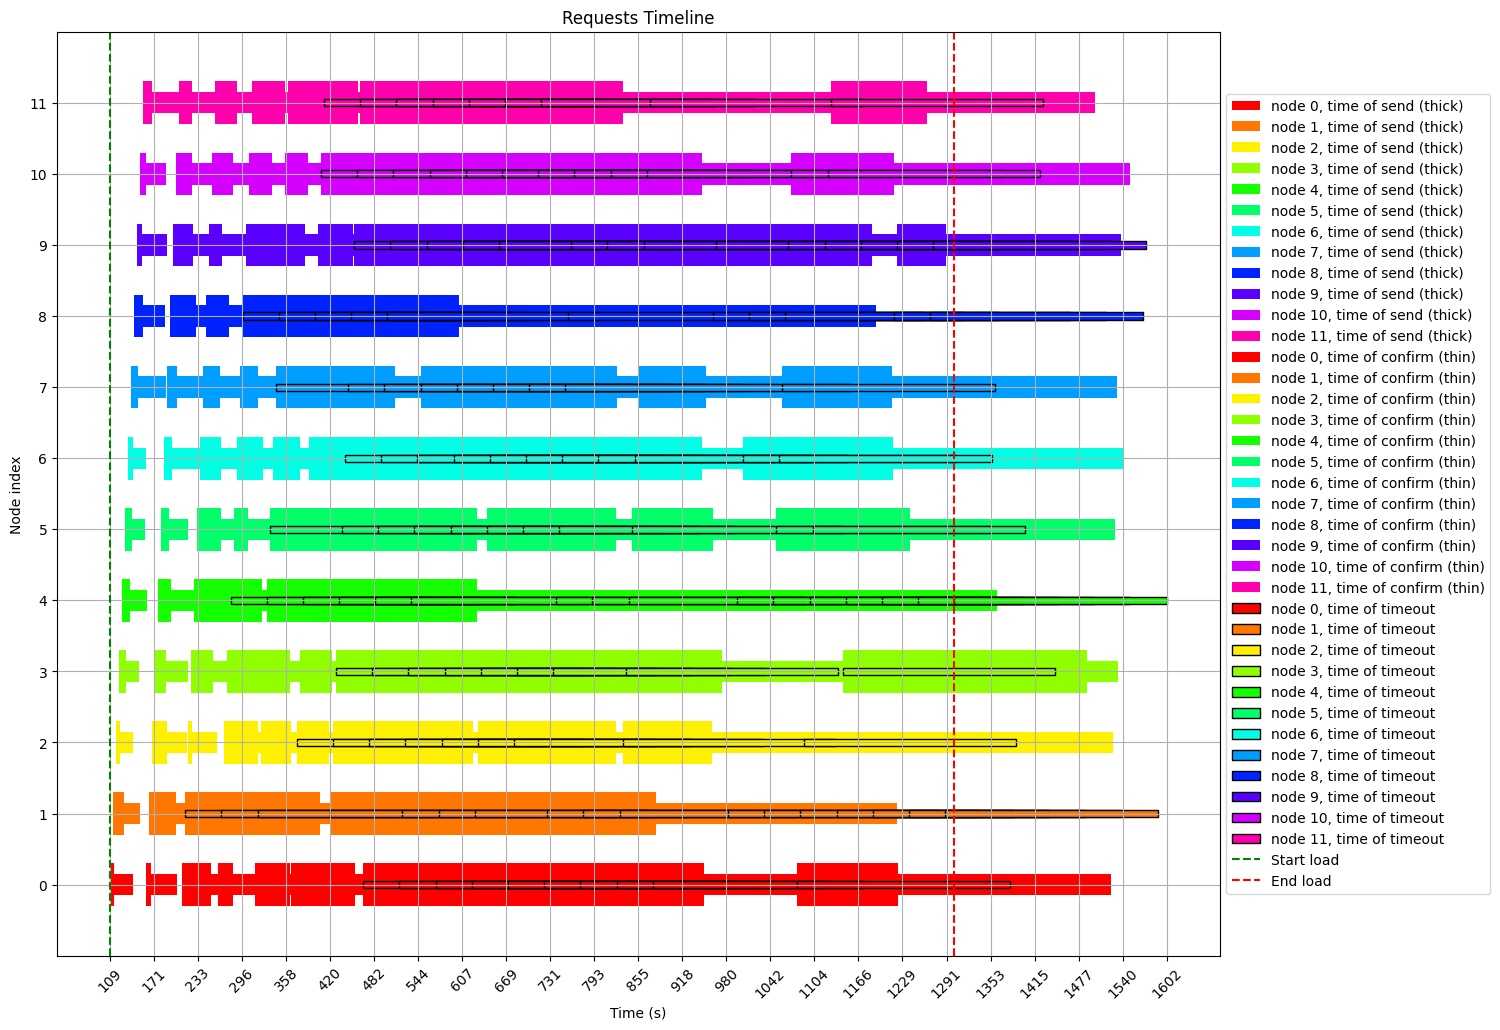

In [102]:
FACTOR = 1e3
count = timings['node'].max() + 1
plt.figure(figsize=(15, count))
cmap = get_cmap(count)

def plot_duration(data, name, th, colors, **kwargs):
    for nnum, group in data.groupby('node'):
        data = list(zip(group['start'] / FACTOR, group['duration']  / FACTOR))
        label = f"node {nnum}, time of {name}"
        color = colors if isinstance(colors, str) else colors[nnum]
        plt.broken_barh(data, (nnum-th/2, th), facecolor=color, label=label, **kwargs)

plot_duration(success, "send (thick)", 0.6, cmap)
plot_duration(confirmed, "confirm (thin)", 0.3, cmap)
plot_duration(timeouted, "timeout", 0.1, cmap, edgecolor="black")

plt.axvline(start_load / FACTOR, color="green", label="Start load", ls="--")
plt.axvline(end_load / FACTOR, color="red", label="End load", ls="--")

# Formatting
plt.xticks(np.linspace(timings["start"].min() / FACTOR, timings["end"].max() / FACTOR, 25), rotation=45)
plt.yticks(np.linspace(0, count - 1, count))

plt.xlabel('Time (s)')
plt.ylabel('Node index')
plt.title('Requests Timeline')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-1, count)
plt.grid(True)
plt.show()

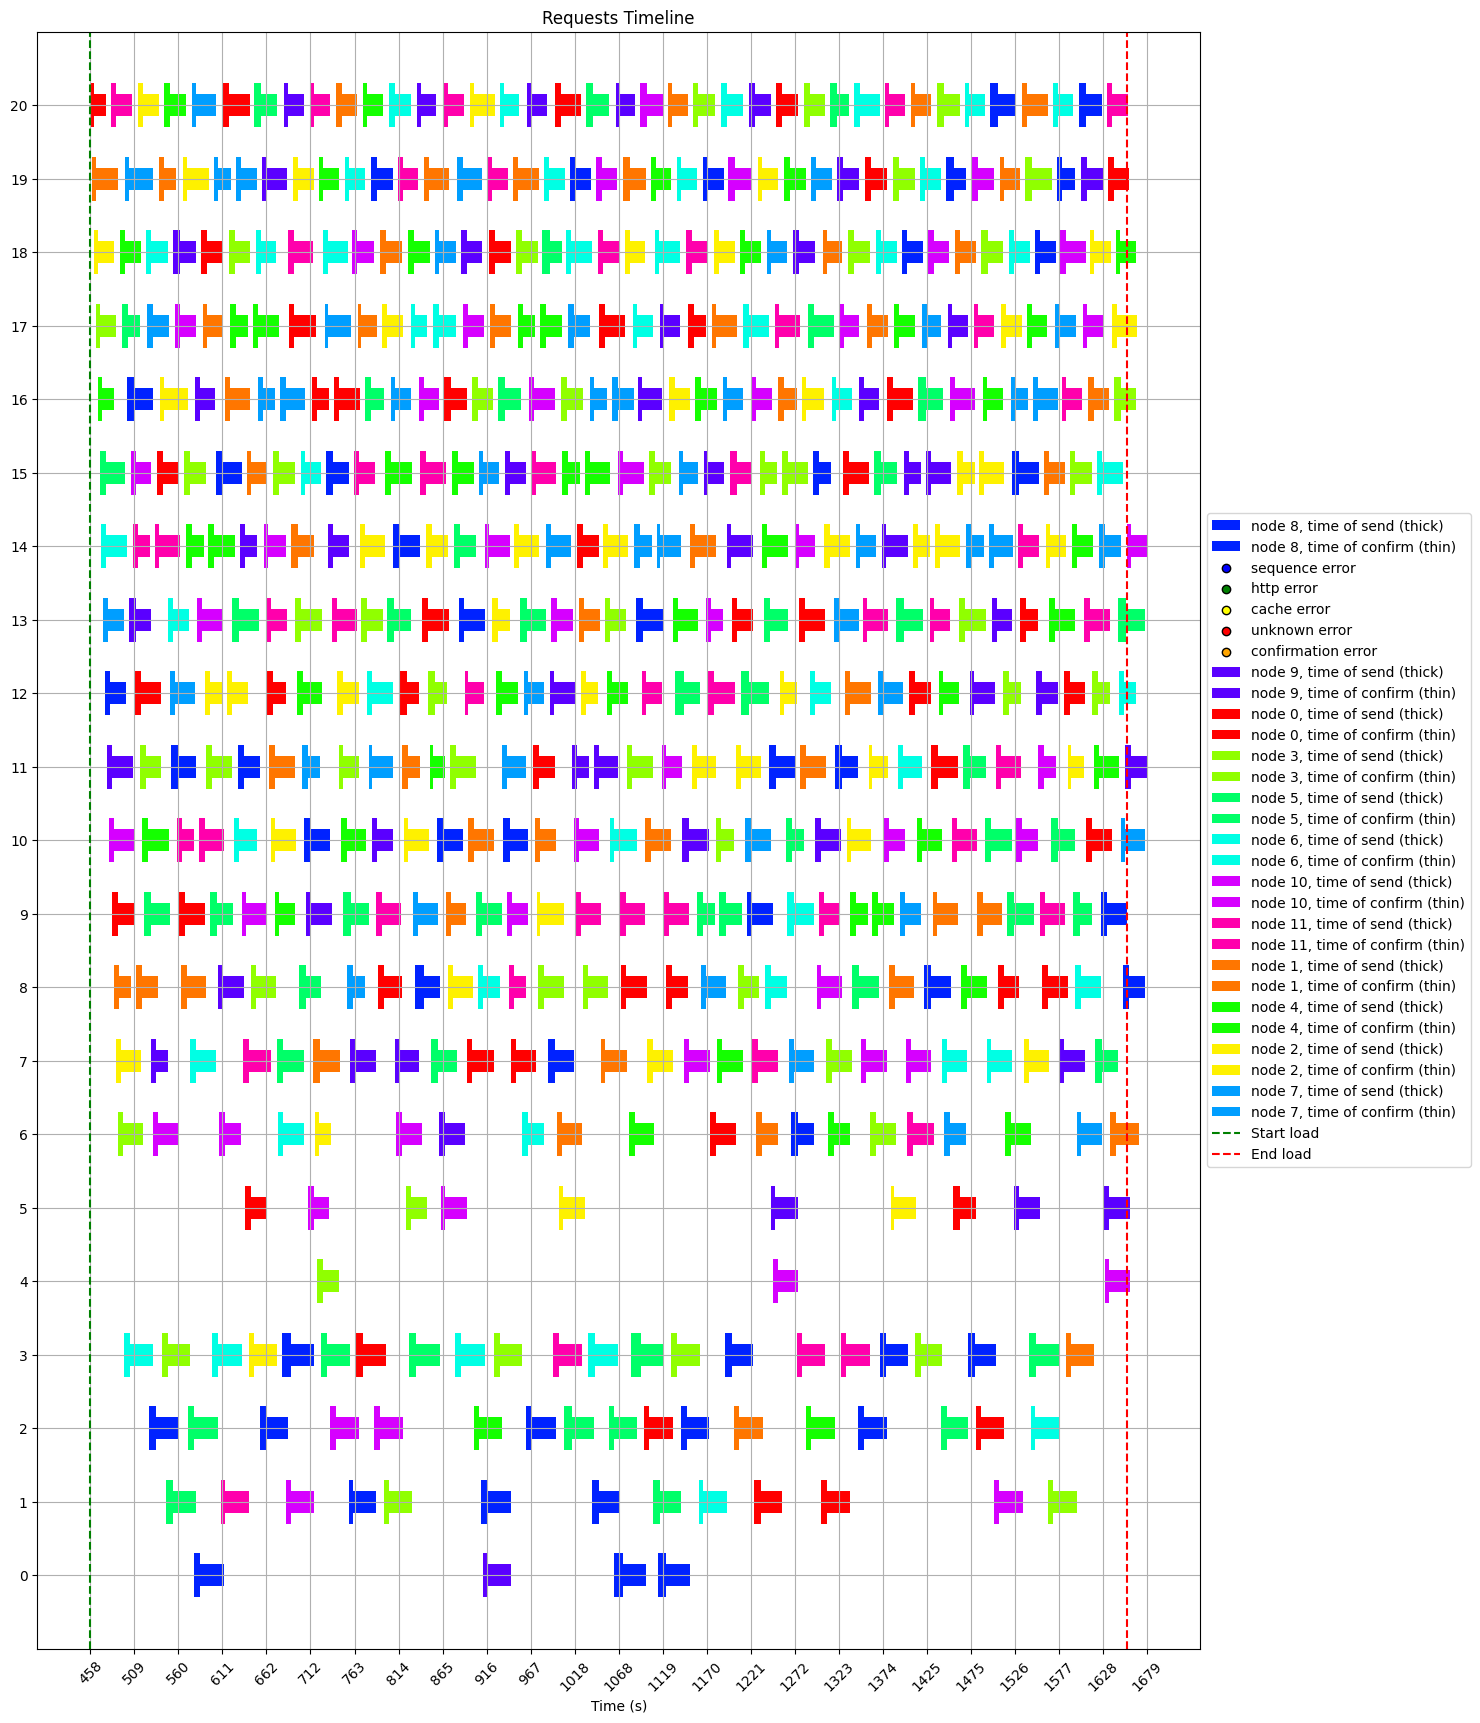

In [52]:
threshold = 5e3
lines = []
def place_in_lines(group):
    start = group['start'].min()
    end = group['end'].max()
    
    placed = False
    for i, line in enumerate(lines):
        line_end, line_groups = line
        if line_end + threshold < start:
            line_groups.append(group)
            lines[i] = (end, line_groups)
            placed = True
            break

    if not placed:
        lines.append((end, [group]))

groups = timings.groupby('id')

quantile = groups.apply(
    lambda g: g['duration'].max(),
    include_groups = False
).quantile(0.90)
# quantile = float("inf")
long_groups = []

for _, group in groups:
    duration = group['duration'].max()

    if duration > quantile:
        long_groups.append(group)
    else:
        place_in_lines(group)

for group in long_groups:
    place_in_lines(group)

lines = [pd.concat(groups) for _, groups in lines]

FACTOR = 1e3
nodes = len(timings['node'].unique())
cmap = get_cmap(nodes)

plt.figure(figsize=(15, len(lines)))

labels = set()
def plot_line(i, line):
    def plot_pdata(pdata, th, label, color, **kwargs):
        if len(pdata) == 0:
            return
        data = list(zip(pdata['start'] / FACTOR, pdata['duration']  / FACTOR))
        plt.broken_barh(data, (i-th/2, th), facecolor=color, label=label if not label in labels else "", **kwargs)
        labels.add(label)
    
    for nnum, pdata in line.groupby('node'):
        sent = pdata[pdata["status"] == "success"]
        confirmed = pdata[pdata["status"] == "confirmed"]
        timeout = pdata[pdata["status"] == "timeout"]
        color = cmap[nnum]

        plot_pdata(sent, 0.6, f"node {nnum}, time of send (thick)", color)
        plot_pdata(confirmed, 0.3, f"node {nnum}, time of confirm (thin)", color)
        plot_pdata(timeout, 0.1, f"node {nnum}, timeout", color=color, edgecolors="red")
        
        for n, req in pdata.groupby('nonce'):
            if req["status"].str.contains("confirmed").any():
                continue
            if req["status"].str.contains("timeout").any():
                continue
            data = pd.DataFrame([req.agg({"start": "min", "duration": "max"})])
            assert(len(data) == 1)
            plot_pdata(data, 0.1, f"node {nnum}, timeout", color=color, edgecolors="red")
        
        retries = {
            "seq-err": ("blue", "sequence error"),
            "http-err": ("green", "http error"),
            "cache-err": ("yellow", "cache error"),
            "error": ("red", "unknown error"),
            "confirm-error": ("orange", "confirmation error")
        }
        for status, (color, label) in retries.items():
            data = pdata[pdata["status"] == status]
            plt.scatter(
                data['end'] / FACTOR, 
                [i] * len(data), 
                color=color, 
                edgecolor="black", 
                label=label if not label in labels else ""
            )
            labels.add(label)

for i, line in enumerate(reversed(lines)):
    plot_line(i, line)

plt.axvline(start_load / FACTOR, color="green", label="Start load", ls="--")
plt.axvline(end_load / FACTOR, color="red", label="End load", ls="--")

# Formatting
plt.xticks(np.linspace(timings["start"].min() / FACTOR, timings["end"].max() / FACTOR, 25), rotation=45)
plt.yticks(np.linspace(0, len(lines) - 1, len(lines)))

plt.xlabel('Time (s)')
plt.title('Requests Timeline')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-1, len(lines))
plt.grid(True)
plt.show()

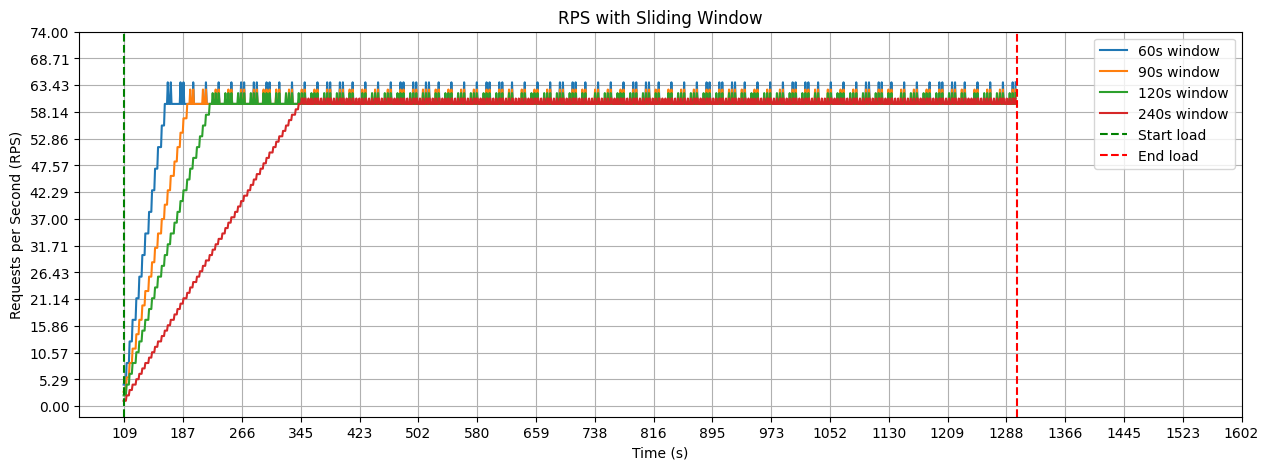

In [120]:
reqs = timings[["start", "size", "id"]].copy()
reqs = reqs.groupby("id").agg({"size": "first", "start": "min"})
reqs["start"] = pd.to_timedelta(reqs["start"], unit="ms")
reqs = reqs.set_index("start").sort_index()

# Resample to 1-second frequency
resampled = reqs["size"].resample('1s').sum()

def plot_window(window_size):
    FACTOR = 1e9
    rps = resampled.rolling(window=window_size, min_periods=0).sum() / window_size
    plt.plot(rps.index / FACTOR, rps.values, label="{}s window".format(window_size))
    return rps

plt.figure(figsize=(15, 5))
# Plot
rps60 = plot_window(60)
plot_window(90)
plot_window(120)
plot_window(240)

plt.axvline(start_load / 1000, color="green", label="Start load", ls="--")
plt.axvline(end_load / 1000, color="red", label="End load", ls="--")

plt.xticks(np.linspace(timings["start"].min() / FACTOR, timings["end"].max() / FACTOR, 20))
plt.yticks(np.linspace(0, np.floor(rps60.max()) + 10, 15))
plt.xlabel('Time (s)')
plt.ylabel('Requests per Second (RPS)')
plt.title('RPS with Sliding Window')
plt.grid(True)
plt.legend()
plt.show()

end
0 days 00:02:21.223443968     8.533333
0 days 00:02:22.223443968     8.533333
0 days 00:02:23.223443968     8.533333
0 days 00:02:24.223443968     8.533333
0 days 00:02:25.223443968     8.533333
0 days 00:02:26.223443968     8.533333
0 days 00:02:27.223443968     8.533333
0 days 00:02:28.223443968     8.533333
0 days 00:02:29.223443968    12.800000
0 days 00:02:30.223443968    12.800000
0 days 00:02:31.223443968    17.066667
0 days 00:02:32.223443968    17.066667
0 days 00:02:33.223443968    17.066667
0 days 00:02:34.223443968    17.066667
0 days 00:02:35.223443968    17.066667
0 days 00:02:36.223443968    17.066667
0 days 00:02:37.223443968    17.066667
0 days 00:02:38.223443968    21.333333
0 days 00:02:39.223443968    25.600000
0 days 00:02:40.223443968    29.866667
0 days 00:02:41.223443968    29.866667
0 days 00:02:42.223443968    29.866667
0 days 00:02:43.223443968    29.866667
0 days 00:02:44.223443968    29.866667
0 days 00:02:45.223443968    29.866667
0 days 00:02:46.22344

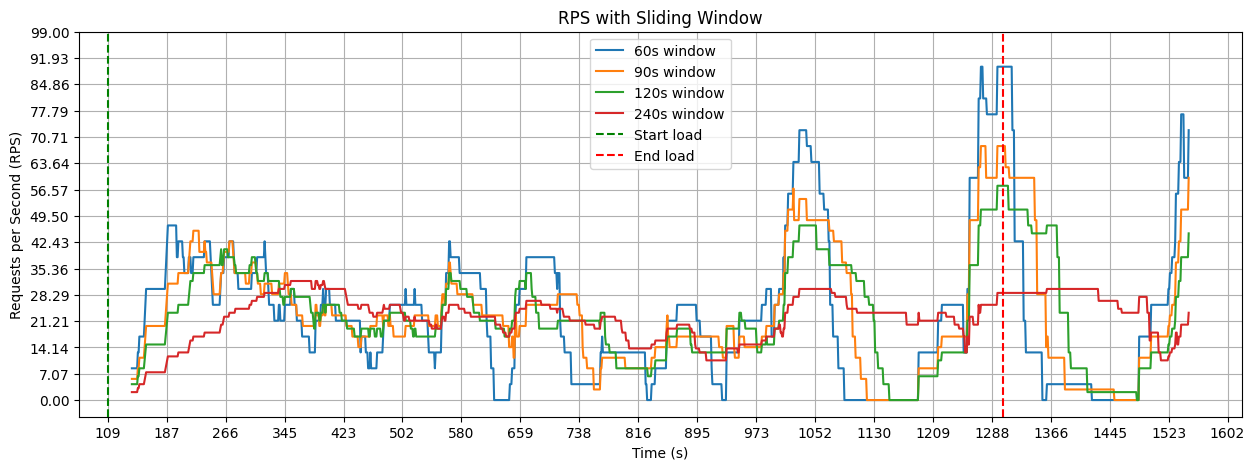

In [118]:
reqs = confirmed[["end", "size"]].copy()
reqs["end"] = pd.to_timedelta(reqs["end"], unit="ms")
reqs = reqs.groupby("end")["size"].sum()

# Resample to 1-second frequency
resampled = reqs.resample('1s').sum()

def plot_window(window_size):
    FACTOR = 1e9
    rps = resampled.rolling(window=window_size, min_periods=0).sum() / window_size
    plt.plot(rps.index / FACTOR, rps.values, label="{}s window".format(window_size))
    return rps

plt.figure(figsize=(15, 5))
# Plot
rps60 = plot_window(60)
print(rps60)
plot_window(90)
plot_window(120)
plot_window(240)

plt.axvline(start_load / 1000, color="green", label="Start load", ls="--")
plt.axvline(end_load / 1000, color="red", label="End load", ls="--")

plt.xticks(np.linspace(timings["start"].min() / FACTOR, timings["end"].max() / FACTOR, 20))
plt.yticks(np.linspace(0, np.floor(rps60.max()) + 10, 15))
plt.xlabel('Time (s)')
plt.ylabel('Requests per Second (RPS)')
plt.title('RPS with Sliding Window')
plt.grid(True)
plt.legend()
plt.show()

In [55]:
confirmed["size"].sum() / (confirmed["end"].max() - confirmed["start"].min()) * 1000

44.272232050506524

In [56]:
print(success["duration"].quantile([0.95, 0.99]))
print(confirmed["duration"].quantile([0.95, 0.99]))

0.95    8012.689169
0.99    9320.473822
Name: duration, dtype: float64
0.95    33132.614172
0.99    34866.631472
Name: duration, dtype: float64


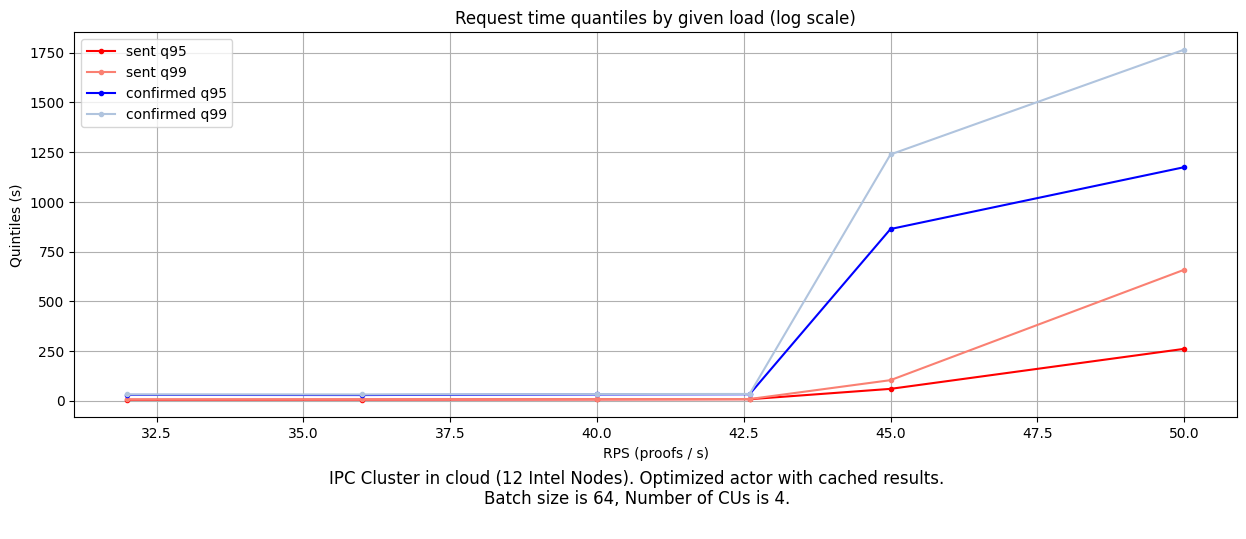

In [57]:
plt.figure(figsize=(15, 5))

loads =              [32,   36,   40,    42.6,  45,     50]

sent_q95 = pd.Series([5513, 6088, 7097, 7969, 60020,  261046]) / 1e3
sent_q99 = pd.Series([7032, 7211, 8421, 8841, 103749, 658518]) / 1e3

confirmed_q95 = pd.Series([29597, 28911, 31937, 33037, 863514,  1174266]) / 1e3
confirmed_q99 = pd.Series([31815, 31947, 33650, 34406, 1238406, 1764969]) / 1e3

plt.plot(loads, sent_q95, label = "sent q95", color="red", marker=".")
plt.plot(loads, sent_q99, label = "sent q99", color="salmon", marker=".")

plt.plot(loads, confirmed_q95, label = "confirmed q95", color="blue", marker=".")
plt.plot(loads, confirmed_q99, label = "confirmed q99", color="lightsteelblue", marker=".")

# plt.yscale("log")
txt="""IPC Cluster in cloud (12 Intel Nodes). Optimized actor with cached results.
Batch size is 64, Number of CUs is 4.
"""
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.xlabel('RPS (proofs / s)')
plt.ylabel('Quintiles (s)')
plt.title('Request time quantiles by given load (log scale)')
plt.grid(True)
plt.legend()
plt.show()

In [155]:
for label in list(confirmed):
    if not "cus" in label:
        continue
    total = confirmed[label].sum()
    print(label, total)

labels.cus.0x63752d302d313731373035363138313132370000000000000000000000000000 6745.0
labels.cus.0x63752d312d313731373035363138313132370000000000000000000000000000 6715.0
labels.cus.0x63752d332d313731373035363138313132370000000000000000000000000000 6814.0
labels.cus.0x63752d322d313731373035363138313132370000000000000000000000000000 6542.0
